In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read data in to dataframes
ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data = pd.read_csv("raw_data/city_data.csv")

In [3]:
print(ride_data.sample(10))
print(city_data.sort_values('driver_count', ascending=True))

                 city                 date   fare        ride_id
559   Christopherfurt  2018-02-08 11:46:15  25.76   951780836764
1700        Grayville  2018-04-06 03:38:40  18.11  6203774514474
946        West Heidi  2018-04-18 20:05:50  32.74  1746486459381
1277   North Markport  2018-04-06 02:16:42  18.15  7268609489111
1630   East Marymouth  2018-03-29 08:36:20  37.60  6370863861570
1329    Lake Scottton  2018-03-29 13:33:11  35.36  3706314280455
1414  South Karenland  2018-02-26 20:40:36  35.61  8413974071006
18       West Anthony  2018-03-06 02:27:01  10.02  9396763280782
888   Christopherfurt  2018-05-03 12:46:04  14.43  5644928631417
746        Port David  2018-03-27 00:20:58  18.43  4635592843405
                   city  driver_count      type
89         South Brenda             1  Suburban
100  North Richardhaven             1  Suburban
107         Taylorhaven             1     Rural
118         Jessicaport             1     Rural
112         North Jaime             1     Rur

In [4]:
# function to map city to city type
def citytype(cityname):
    city_type = city_data[city_data['city'] == cityname]['type'].values[0]
    return city_type

In [5]:
# adding city type to rider_data
ride_data['type'] = ride_data['city'].apply(citytype)

In [6]:
# Data arrays (index/column(s))
# city/avg fare
city_fare = ride_data.groupby('city')['fare'].mean()

# city type/total fare
type_fare = ride_data.groupby('type')['fare'].sum()

# city/total rides given
city_ride = ride_data.groupby('city')['ride_id'].nunique()

# city type/total rides 
type_ride = ride_data.groupby('type')['ride_id'].nunique()

# index/city/total drivers
city_drivers = city_data[['city','driver_count']].sort_values('city',ascending=True)

# city type/total drivers
type_drivers = city_data.groupby('type')['driver_count'].sum()

# index/city/city type
city_type = city_data[['city','type']].sort_values('city',ascending=True)

# city type/total fare
type_fare = ride_data.groupby('type')['fare'].sum()


In [7]:
# function to map city type to a color
def citycolor(citytype):
    if citytype == 'Urban':
        color = sns.xkcd_rgb["gold"]
    elif citytype == 'Suburban':
        color = sns.xkcd_rgb["sky blue"]
    elif citytype == 'Rural':
        color = sns.xkcd_rgb["light salmon"]
    else:
        color = 'grey'
    return color

In [20]:
# bubble size = total drivers
bubble_size = city_drivers['driver_count'].values

# color = city type
color = city_data['type'].apply(citycolor)

In [21]:
plt.rcParams['figure.figsize'] = [15, 10]

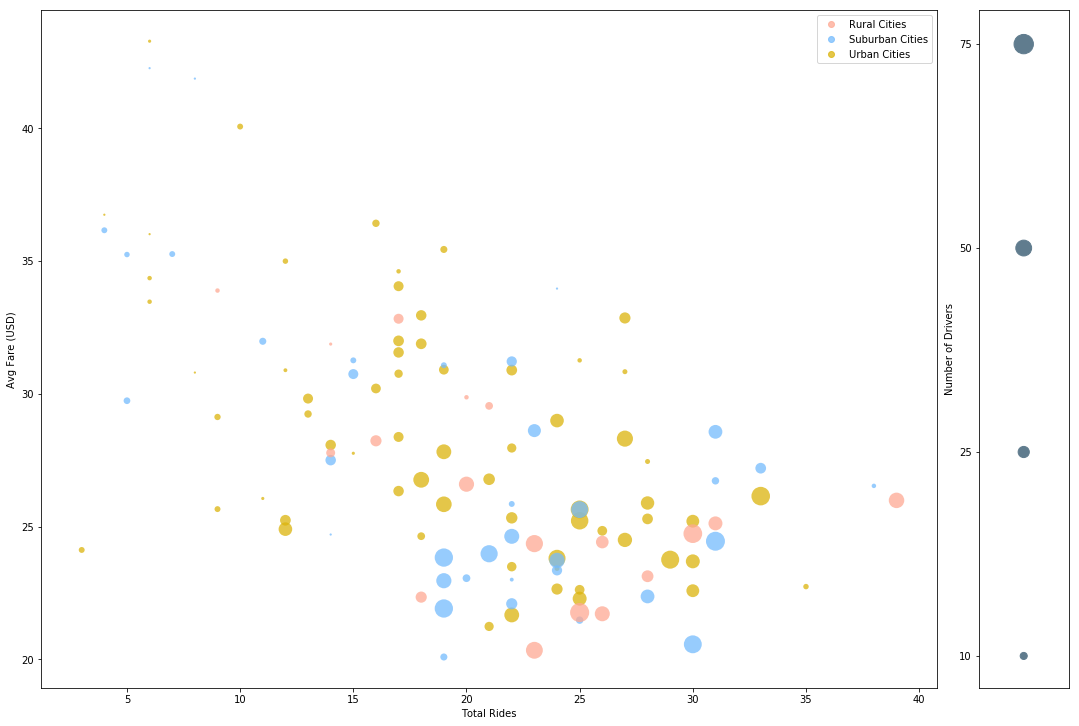

In [35]:
# Sub Plot setup
fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[10, 1]})
fig.suptitle('', fontsize=16, fontweight="bold")
fig.tight_layout()

# legend setup
urban_handle, = ax1.plot([],[], marker='o', linestyle='None', color=sns.xkcd_rgb["gold"], 
                         label='Urban Cities', alpha=0.75)
sub_handle, = ax1.plot([],[], marker='o', linestyle='None', color=sns.xkcd_rgb["sky blue"], 
                       label='Suburban Cities', alpha=0.75)
rural_handle, = ax1.plot([],[], marker='o', linestyle='None', color=sns.xkcd_rgb["light salmon"], 
                         label='Rural Cities', alpha=0.75)
example_bubbles = [50,125,250,375]

# first subplot
ax1.scatter(city_ride.values,city_fare.values, marker='o', facecolors=color, edgecolor=sns.xkcd_rgb["black"], 
            linewidth=0, s=(bubble_size * 5), alpha=0.75)
ax1.set_xlabel('Average Fare, Total Rides, and Total Drivers by City')
ax1.legend(handles=[rural_handle, sub_handle, urban_handle], loc='best')
ax1.set_xlabel('Total Rides')
ax1.set_ylabel('Avg Fare (USD)')

# second subplot
ax2.scatter([1,1,1,1], [1,2,3,4], marker="o", s=(example_bubbles), facecolors=sns.xkcd_rgb["blue grey"])
ax2.set_xticks([])
ax2.set_xticklabels([''])
ax2.set_yticks([1,2,3,4])
ax2.set_yticklabels([10,25,50,75])
ax2.set_ylabel('Number of Drivers')

plt.show()

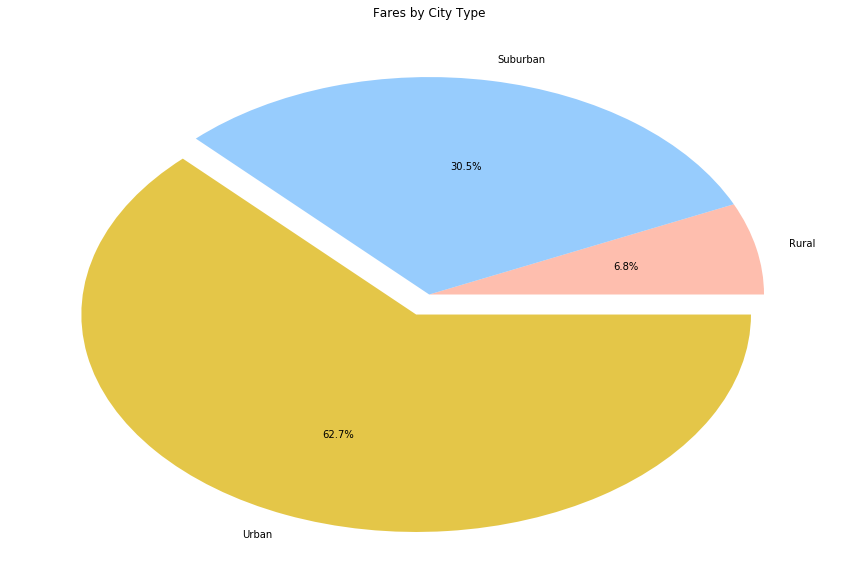

In [11]:
# setting pie chart colors
colors = [sns.xkcd_rgb["light salmon"], sns.xkcd_rgb["sky blue"], sns.xkcd_rgb["gold"]]
# setting pie chart explode
explode = [0,0,.1]
# setting pie chart plot
farepie = plt.pie(type_fare.values, labels=type_fare.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0)

# messing with color transparency
farepie[0][0].set_alpha(0.75)
farepie[0][1].set_alpha(0.75)
farepie[0][2].set_alpha(0.75)

plt.title('Fares by City Type')
plt.show()




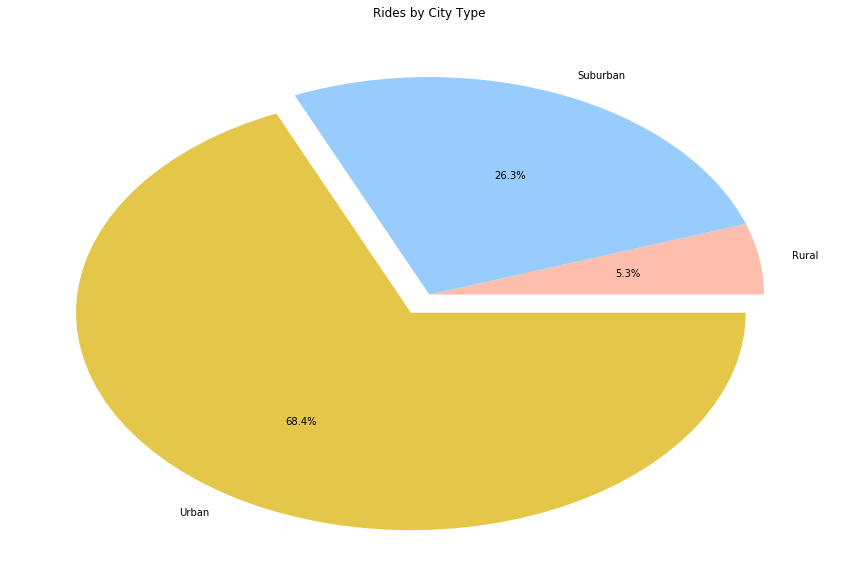

In [12]:
# setting pie chart plot
ridepie = plt.pie(type_ride.values, labels=type_ride.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0)

# messing with color transparency
ridepie[0][0].set_alpha(0.75)
ridepie[0][1].set_alpha(0.75)
ridepie[0][2].set_alpha(0.75)

plt.title('Rides by City Type')
plt.show()


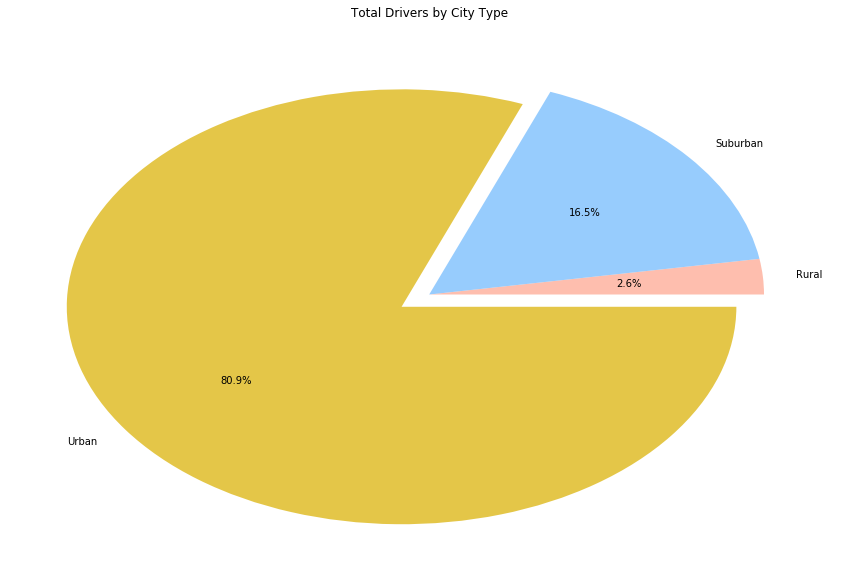

In [13]:
# setting pie chart plot
driverpie = plt.pie(type_drivers.values, labels=type_drivers.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0)

# messing with color transparency
driverpie[0][0].set_alpha(0.75)
driverpie[0][1].set_alpha(0.75)
driverpie[0][2].set_alpha(0.75)

plt.title('Total Drivers by City Type')
plt.show()
